# **SENTIMENTAL ANALYSIS OF IMDB DATASET PROJECT**

# Main Libraries


We start by importing the main libraires that we will use:

the re module (for regular expression matching operations) the nltk toolkit (for natural language operations) the random module (for random number generation) the numpy library (for arrays operations) the pandas library (for data analysis) the scipy.stats module (for statistics) the seaborn library (for statistical data visualization) the matplotlib.pyplot interface (for MATLAB-like plots)

In [78]:
import re
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#nltk.download('punkt')
#nltk.download('stopwords')

# Setting as large the xtick and ytick font sizes in graphs

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
     

**IMDB dataset**
We retrieve from Kaggle the csv file "IMDB Dataset.csv" consisting of 50'000 IMDB movies and TV shows reviews with their positive or negative sentiment classification.

In [79]:
from google.colab import drive

In [80]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





**IMDB dataset**
We retrieve from Kaggle the csv file "IMDB Dataset.csv" consisting of 50'000 IMDB movies and TV shows reviews with their positive or negative sentiment classification.

In [81]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


df.shape: (50000, 2)
df.columns: Index(['review', 'sentiment'], dtype='object') 

df.sentiment.value_counts():
positive    25000
negative    25000
Name: sentiment, dtype: int64 



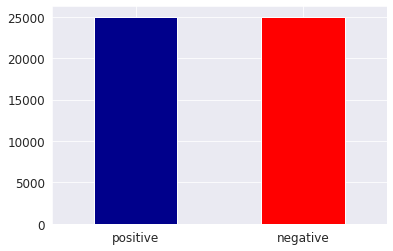

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [82]:
#We print the basic properties of the DataFrame. 
#In particular, we note that there are no null values in the DataFrame.
print('\033[1m' + 'df.shape:' + '\033[0m', df.shape)
print('\033[1m' + 'df.columns:' + '\033[0m', df.columns, '\n')
print('\033[1m' + 'df.sentiment.value_counts():' + '\033[0m')
print(df.sentiment.value_counts(), '\n')

with sns.axes_style("darkgrid"):
    df['sentiment'].value_counts().plot.bar(color=['darkblue', 'r'], rot=0, fontsize='large')
    plt.show()

print('\033[1m' + 'df.info:' + '\033[0m')
df.info()

To make the DataFrame suitable for analysis by converting its sentiment values to integers:

positive → 1 negative → 0

In [83]:
df.sentiment = [1 if s == 'positive' else 0 for s in df.sentiment]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


**Data preprocessing**

First, we use regular expressions to make the following transformations to the reviews:

remove punctuation marks remove HTML tags remove URL's remove characters which are not letters or digits remove successive whitespaces convert the text to lower case strip whitespaces from the beginning and the end of the reviews

In [84]:
# Storing in "before_process" a random example of review before preprocessing
# Defining and applying the function "process" performing the transformations of the reviews
# Storing in "after_process" the example of review after preprocessing
idx = random.randint(0, len(df)-1)
before_process = df.iloc[idx][0]

def process(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

df['review'] = df['review'].apply(lambda x: process(x))
after_process = df.iloc[idx][0]
     

Next, we remove stopwords from the reviews using the word_tokenize() function from the nltk.tokenize package.

In [85]:

# Storing in "sw_set" the set of English stopwords provided by nltk
# Defining and applying the function "sw_remove" which remove stopwords from reviews
# Storing in "after_removal" the example of review after removal of the stopwords

idx = random.randint(0, len(df)-1)
before_process = df.iloc[idx][0]
     

In [86]:
def process(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

df['review'] = df['review'].apply(lambda x: process(x))
after_process = df.iloc[idx][0]
     

In [87]:

nltk.download('stopwords')
sw_set = set(nltk.corpus.stopwords.words('english'))
def sw_remove(x):
  words = nltk.tokenize.word_tokenize(x)
  filtered_list = [word for word in words if word not in sw_set]
  return ' '.join(filtered_list)
  df['review'] = df['review'].apply(lambda x: sw_remove(x))
  after_removal = sw_remove(after_process)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
print('\033[1m' + 'Review #%d before preprocessing:' % idx + '\033[0m' + '\n', before_process, '\n')
print('\033[1m' + 'Review #%d after preprocessing:' % idx + '\033[0m' + '\n', after_process, '\n')
# print('\033[1m' + 'Review #%d after preprocessing and stopwords removal:' % idx + '\033[0m' + '\n', after_removal)
     

Review #25657 before preprocessing:
 ah yes the vs series mvc2 being the pinnacle it s been said before this is what you get when half of the crew fell asleep on the job unfortunately the gameplay half did don t get me wrong this is fun but you get tired of mashing buttons as for the plot summary ahahahahahaaaaa there is no plot beat that guy at the end and win eh who plays this by their self anyway 

Review #25657 after preprocessing:
 ah yes the vs series mvc2 being the pinnacle it s been said before this is what you get when half of the crew fell asleep on the job unfortunately the gameplay half did don t get me wrong this is fun but you get tired of mashing buttons as for the plot summary ahahahahahaaaaa there is no plot beat that guy at the end and win eh who plays this by their self anyway 



For illustration, we print the example of review before preprocessing, after preprocessing and after stopwords removal.

In [89]:
from sklearn.model_selection import train_test_split

train_rev, test_rev, train_sent, test_sent = train_test_split(df['review'], df['sentiment'], test_size=0.1, random_state=42)

print('\033[1m' + 'train_rev.shape:' + '\033[0m', train_rev.shape)
print('\033[1m' + 'test_rev.shape:' + '\033[0m', test_rev.shape)
print('\033[1m' + 'train_sent.shape:' + '\033[0m', train_sent.shape)
print('\033[1m' + 'test_sent.shape:' + '\033[0m', test_sent.shape)

train_rev.shape: (45000,)
test_rev.shape: (5000,)
train_sent.shape: (45000,)
test_sent.shape: (5000,)


**Data splitting and tokenization**

We start by splitting our DataFrame into a training and test lists. We use the train_test_split() function from the sklearn.model_selection module which allow to perform the splitting randomly with respect to the index of the DataFrame.

In [90]:

from keras.preprocessing.text import Tokenizer

dict_size = 35000
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(df['review'])

print('\033[1m' + 'Dictionary size:' + '\033[0m', dict_size)
print('\033[1m' + 'Length of the tokenizer index:' + '\033[0m', len(tokenizer.word_index))
print('\033[1m' + 'Number of documents the tokenizer was trained on:' + '\033[0m', tokenizer.document_count, '\n')
print('\033[1m' + 'First 20 entries of the tokenizer index:' + '\033[0m')
print(*list(tokenizer.word_index.items())[:20])
     

Dictionary size: 35000
Length of the tokenizer index: 125949
Number of documents the tokenizer was trained on: 50000 

First 20 entries of the tokenizer index:
('the', 1) ('and', 2) ('a', 3) ('of', 4) ('to', 5) ('is', 6) ('it', 7) ('in', 8) ('i', 9) ('this', 10) ('that', 11) ('s', 12) ('was', 13) ('as', 14) ('for', 15) ('movie', 16) ('with', 17) ('but', 18) ('film', 19) ('you', 20)


We use the texts_to_sequences() function of the Tokenizer class to convert the training reviews and test reviews to lists of sequences of integers (tokens) "train_rev_tokens" and "test_rev_tokens", and we store in the numpy array "seq_lengths" the lengths of the sequences included in "train_rev_tokens".



In [91]:
train_rev_tokens = tokenizer.texts_to_sequences(train_rev)
test_rev_tokens = tokenizer.texts_to_sequences(test_rev)
seq_lengths =  np.array([len(sequence) for sequence in train_rev_tokens])
     

If the lengths of the sequences were normally distributed, then a given length could be considered small or large when outside the interval

mean value of seq_lengths±2 standard deviations of seq_lengths,

and lengths not belonging to this interval would only represent 5% of the elements of seq_lengths. Here, we follow this heuristics, and thus define an upper bound for the length of sequences accordingly.

(note that we use only the training set to define this upper bound, in order to avoid any data leakage or look-ahead bias)

The value of upper_bound is 575 and the percentage of sequences in "train_rev_tokens" of length smaller or equal than upper_bound is 94.57%.


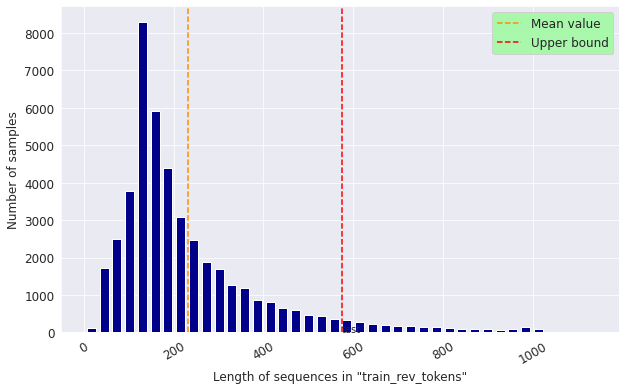

In [92]:
# Storing in "upper_bound" our chosen upper bound for the length of sequences
# Computing the percentage of lengths smaller or equal than "upper_bound"

upper_bound = int(np.mean(seq_lengths) + 2 * np.std(seq_lengths))
percentage = stats.percentileofscore(seq_lengths, upper_bound)

print('The value of upper_bound is %d and the percentage of sequences in "train_rev_tokens" \
of length smaller or equal than upper_bound is %.2f%%.' % (upper_bound, round(percentage, 2)))

# Histogram plot of the lengths of the sequences in "train_rev_tokens"

with sns.axes_style("darkgrid"):

    _, hist = plt.subplots(figsize=(10,6))
    hist.hist(seq_lengths[seq_lengths < 2*upper_bound], color='darkblue', bins=40, rwidth=0.7)
    hist.axvline(np.mean(seq_lengths), color='darkorange', linestyle='--', label='Mean value')
    hist.axvline(upper_bound, color='r', linestyle='--', label='Upper bound')

    plt.xlabel('Length of sequences in "train_rev_tokens"', size='large')
    plt.ylabel('Number of samples', size='large')
    plt.text(upper_bound, 0, 'test')
    plt.legend(fontsize='large', facecolor='palegreen')
    plt.xticks(rotation=30)
    plt.show()

The value of upper_bound is 575 and the percentage of sequences in "train_rev_tokens" of length smaller or equal than upper_bound is 94.57%.


Using the pad_sequences() function from keras.preprocessing.sequence module, we transform "train_rev_tokens" and "test_rev_tokens" into 2D numpy arrays of shape (number of sequences, upper_bound). Sequences of length smaller (resp. larger) than "upper_bound" are extended (resp. truncated) to get a length equal to "upper_bound".

In [93]:
from keras_preprocessing.sequence import pad_sequences
train_rev_pad = pad_sequences(train_rev_tokens, maxlen=upper_bound)
test_rev_pad = pad_sequences(test_rev_tokens, maxlen=upper_bound)

print('\033[1m' + 'train_rev_pad.shape:' + '\033[0m', train_rev_pad.shape)
print('\033[1m' + 'test_rev_pad.shape:' + '\033[0m', test_rev_pad.shape, '\n')

# Printing an example of review after padding

idx_pad = random.randint(0, len(train_rev_pad)-1)
print('\033[1m' + 'Review #%d after padding:' %idx_pad + '\033[0m' + '\n', train_rev_pad[idx_pad])
     

train_rev_pad.shape: (45000, 575)
test_rev_pad.shape: (5000, 575) 

Review #39596 after padding:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

**LSTM Model**

We start by importing some classes from Keras:

the Sequential class from the keras.models API (to group a linear stack of layers into a model) the Embedding class from the keras.layers API (to turn positive integers (indexes) into dense vectors of fixed size) the LSTM class from the keras.layers API (to apply a long short-term memory layer to an input) the Dropout class from the keras.layers API (to apply dropout to an input) the Dense class from the keras.layers API (to apply a regular densely-connected NN layer to an input)

In [94]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
     

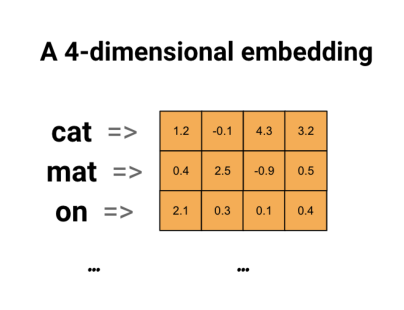

In [95]:
# Importing the "imageio.v3" library (for reading and writing images)
# See https://imageio.readthedocs.io/en/stable/
import imageio as iio
im = iio.imread('imageio:chelsea.png')
image = iio.imread("https://www.tensorflow.org/text/guide/images/embedding2.png")
plt.figure(figsize = (7, 7))
plt.imshow(image)
plt.axis('off');

**In the LSTM model, we set the following parameters:**

the output dimension of the Embedding layer (dimension of the vector space containing the word embeddings) is "output_dim" the number of units of the LSTM layer is "units_lstm" the dropout rate of the Dropout layer is "r" the activation function of the final Dense layer is sigmoid (this is a natural choice since the output of the model should be a number between 0, for negative reviews, and 1, for positive reviews)

In [96]:
output_dim = 14
units_lstm = 16
r = 0.8

model = Sequential()
model.add(Embedding(input_dim=dict_size, output_dim=output_dim, input_length=upper_bound))
model.add(LSTM(units_lstm))
model.add(Dropout(r))
model.add(Dense(1, activation='sigmoid'))
     

We give a summary of the model using the summary method of the model class of Keras. The "None" value stands for the (not yet defined) value of the batch size.

In [97]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 575, 14)           490000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                1984      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 492,001
Trainable params: 492,001
Non-trainable params: 0
_________________________________________________________________


We import the plot_model function from the keras.utils.vis_utils module to plot a schema of the model.

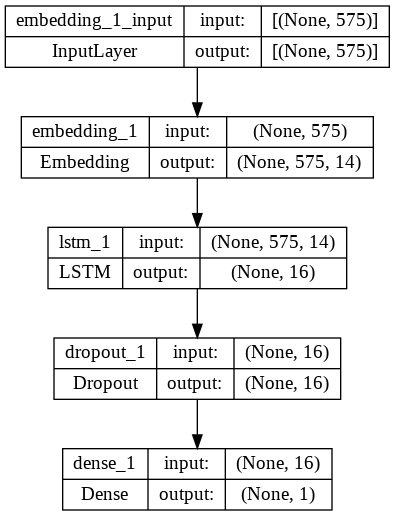

In [98]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True)


We compile the model for training with the following parameters:

adam as optimizer to use during training process (a combination of gradient descent with momentum and RMSP) binary cross-entropy (bce) between true labels and predicted labels as loss to minimise during training process accuracy as metric to display during training process (how often predicted labels equal true labels)

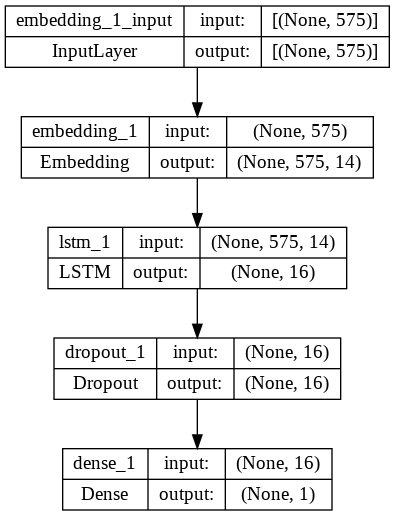

In [99]:

from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True)

In [100]:

model.compile(optimizer='adam', loss='bce', metrics='accuracy')

We train the model with "train_rev_pad" as input array, "train_sent" as output array, validation split, batch size, number of epochs, and the option "shuffle=True" to shuffle the training data before each epoch. An epoch is a pass of the neural network over the entire training set and the batch size is the number of samples that are passed to the network at once. For each epoch, we thus have

number of training steps=length of training set - length of validation setbatch size

In [101]:
validation_split = 0.1
batch_size = 384
epochs = 3

fitted = model.fit(train_rev_pad, train_sent, validation_split=validation_split,
                   batch_size=batch_size, epochs=epochs, shuffle=True)
     


Epoch 1/3
106/106 [==============================] - 56s 503ms/step - loss: 0.6781 - accuracy: 0.6069 - val_loss: 0.6403 - val_accuracy: 0.7447
Epoch 2/3
106/106 [==============================] - 54s 508ms/step - loss: 0.5003 - accuracy: 0.8113 - val_loss: 0.3752 - val_accuracy: 0.8600
Epoch 3/3
106/106 [==============================] - 57s 536ms/step - loss: 0.3531 - accuracy: 0.8818 - val_loss: 0.2931 - val_accuracy: 0.8856


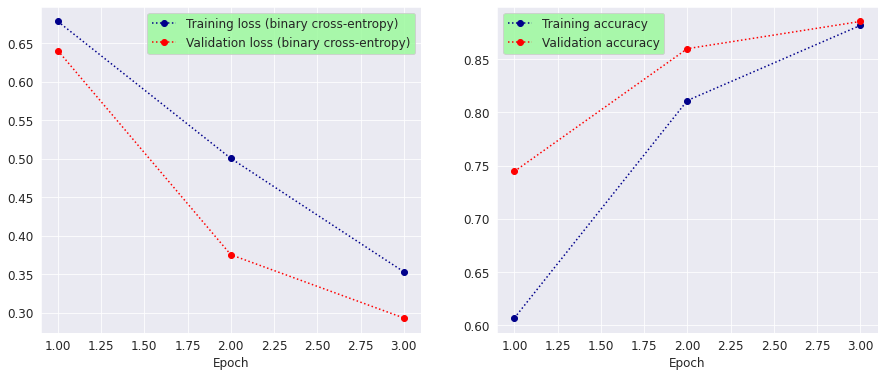

In [102]:
# Storing in "ep_values" the values of the epochs

ep_values = range(1, epochs+1)

# Plot of the training loss and validation loss (binary cross-entropy)

with sns.axes_style("darkgrid"):

    _, (loss, acc) = plt.subplots(1, 2, figsize=(15, 6))
    loss.plot(ep_values, fitted.history['loss'], color='darkblue', linestyle='dotted',
              marker='o', label='Training loss (binary cross-entropy)')
    loss.plot(ep_values, fitted.history['val_loss'], color='r', linestyle='dotted',
              marker='o', label='Validation loss (binary cross-entropy)')
    loss.set_xlabel('Epoch', size='large')
    loss.legend(fontsize='large', facecolor='palegreen')

    acc.plot(ep_values, fitted.history['accuracy'], color='darkblue', linestyle='dotted',
             marker='o', label='Training accuracy')
    acc.plot(ep_values, fitted.history['val_accuracy'], color='r', linestyle='dotted',
             marker='o', label='Validation accuracy')
    acc.set_xlabel('Epoch', size='large')
    acc.legend(fontsize='large', facecolor='palegreen')

    plt.show()

**Results**

First, we evaluate the loss and accuracy of the trained model on the test set.

In [103]:
result= model.evaluate(test_rev_pad, test_sent)

157/157 [==============================] - 6s 37ms/step - loss: 0.2914 - accuracy: 0.8864


In [104]:
from sklearn.metrics import confusion_matrix

predictions = np.round(model.predict(test_rev_pad))
cf_matrix = confusion_matrix(test_sent, predictions)

157/157 [==============================] - 6s 36ms/step


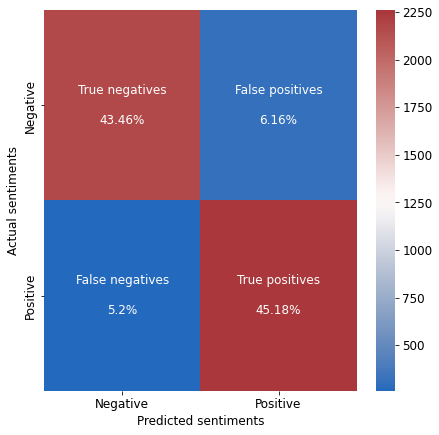

In [105]:

# Storing in "legends" the legends of each entry of the confusion matrix
# Storing in "percentages" the percentages of each entry of the confusion matrix
# Storing in "labels" the grouped values (legend + percentage) of each entry of the confusion matrix

legends = ['True negatives', 'False positives', 'False negatives', 'True positives']
percentages = [round(100*num, 2) for num in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n\n{v2}%' for v1, v2 in zip(legends, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Heatmap plot of the confusion matrix

plt.figure(figsize = (7, 7))

cm = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='vlag', annot_kws={'fontsize': 'large'})
cm.set_xlabel('Predicted sentiments', size='large')
cm.set_ylabel('Actual sentiments', size='large')
cm.xaxis.set_ticklabels(['Negative', 'Positive'])
cm.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

Finally, we test the trained model on a randomly chosen review from the test set. We display the original review, the sentiment predicted by the model with its probability, and the actual (correct) sentiment

In [107]:
# Storing in DataFrame "df_original" the original reviews and sentiments

df_original = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

# Choosing randomly a review and its sentiment in the test data

idx_test = random.randint(0, len(test_sent)-1)
idx_original = test_rev.index[idx_test]
(actual_rev, actual_sent) = df_original.iloc[idx_original]

# Storing in "prediction_sent" the predicted sentiment of the chosen review
# Storing in "probability" the probability of the predicted sentiment of the chosen review

prediction = model.predict(test_rev_pad)[idx_test][0]
prediction_sent = 'positive' if prediction >= 0.5 else 'negative'
probability = round(prediction if prediction >= 0.5 else 1-prediction, 2)

# Printing the original review, its predicted sentiment and probability, and original sentiment

print('\033[1m' + 'Review #%d:' % idx_original + '\033[0m' + '\n', actual_rev, '\n')
print('\033[1m' + 'Predicted sentiment:' + '\033[0m', prediction_sent, '(with probability %.2f)' % probability, '\n')
print('\033[1m' + 'Actual sentiment:' + '\033[0m', actual_sent)

157/157 [==============================] - 6s 37ms/step
Review #26106:
 When you want to celebrate life and love, especially for precious little daughters, you have to shout it from the countryside. And what gorgeous countrysides! There are so many tears of joy even God joins in. See this movie.<br /><br /> 

Predicted sentiment: positive (with probability 0.90) 

Actual sentiment: positive
